<a href="https://colab.research.google.com/github/AdrianLorenzoDev/xray-pneumonia-detection/blob/master/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest X-Ray Image classifier to detect pneumonia

Dataset:
> Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, v2
> http://dx.doi.org/10.17632/rscbjbr9sj.2

In [0]:
from google.colab import drive
drive.mount("/content/drive")

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.nn import relu, sigmoid

## Data augmentation

In [0]:
trainDataDir = '/content/drive/My Drive/Colab Notebooks/datasets/pneumonia/chest_xray/train/'
validationDataDir = '/content/drive/My Drive/Colab Notebooks/datasets/pneumonia/chest_xray/test/'

batchSize = 16
width = 150
height = 150


trainDataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=9,
    shear_range=0.2,
    zoom_range=0.2
)

validationDataGen = ImageDataGenerator(
    rescale=1./255
)

trainGenerator = trainDataGen.flow_from_directory(
    trainDataDir,
    target_size=(width, height),
    batch_size=batchSize,
    class_mode='binary',
    color_mode='grayscale'
)

validationGenerator = validationDataGen.flow_from_directory(
    validationDataDir,
    target_size=(width, height),
    batch_size=batchSize,
    class_mode='binary',
    color_mode='grayscale'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Model

In [0]:
model = Sequential([
    Conv2D(32, (3,3), activation=relu, input_shape=(width, height, 1)),
    Conv2D(32, (3,3), activation=relu),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation=relu), 
    Conv2D(64, (3,3), activation=relu),  
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation=relu), 
    Conv2D(128, (3,3), activation=relu), 
    Conv2D(128, (3,3), activation=relu), 
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation=relu),
    Dropout(0.3),
    Dense(1, activation=sigmoid)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 128)       73856     
__________

In [0]:
history = model.fit_generator(
    generator = trainGenerator,
    steps_per_epoch = trainGenerator.samples // batchSize,
    epochs=14,
    validation_data = validationGenerator,
    validation_steps = validationGenerator.samples // batchSize
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/14
326/326 [==============================] - 1555s 5s/step - loss: 0.4573 - acc: 0.7993 - val_loss: 0.6017 - val_acc: 0.7516
Epoch 2/14
326/326 [==============================] - 73s 223ms/step - loss: 0.2779 - acc: 0.8834 - val_loss: 0.3045 - val_acc: 0.8638
Epoch 3/14
326/326 [==============================] - 72s 220ms/step - loss: 0.2388 - acc: 0.8997 - val_loss: 0.3152 - val_acc: 0.8590
Epoch 4/14
326/326 [==============================] - 75s 231ms/step - loss: 0.2175 - acc: 0.9114 - val_loss: 0.3105 - val_acc: 0.8510
Epoch 5/14
326/326 [==============================] - 73s 224ms/step - loss: 0.1998 - acc: 0.9201 - val_loss: 0.3149 - val_acc: 0.8718
Epoch 6/14
326/326 [==============================] - 73s 222ms/step - loss: 0.1726 - acc: 0.9369 - val_loss: 0.2449 - val_acc: 0.8910
Epoch 7/14
326/326 [==============================] - 73s 222ms/step - loss: 0.1514 - acc: 0.9427 - val_loss: 0.3870 - val_acc: 0.8638
Epoch 8/

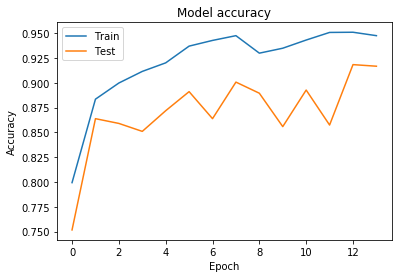

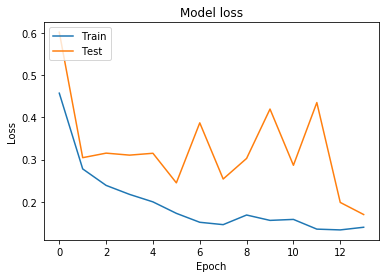

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Small testing

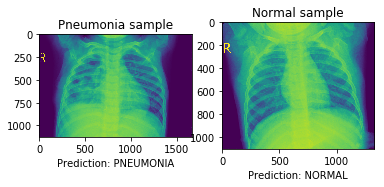

In [0]:
pneumoniaImage = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/pneumonia/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg')
normalImage = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg')

plt.subplot(1,2,1)
plt.imshow(np.asarray(pneumoniaImage))
pneumoniaData = np.array(pneumoniaImage.resize((150,150), Image.ANTIALIAS)).reshape(1, 150, 150, 1)/255
plt.title("Pneumonia sample")
plt.xlabel("Prediction: " + ("PNEUMONIA" if model.predict_classes(pneumoniaData) else "NORMAL"))

plt.subplot(1,2,2)
plt.imshow(np.asarray(normalImage))
normalData = np.array(normalImage.resize((150,150), Image.ANTIALIAS)).reshape(1, 150, 150, 1)/255
plt.title("Normal sample")
plt.xlabel("Prediction: " + ("PNEUMONIA" if model.predict_classes(normalData) else "NORMAL"))
plt.show()